# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/macbook/Documents/Documentos/M2 TIDE/Scoring/autorisations.csv")

In [3]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [4]:
data.shape

(1151432, 25)

In [5]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [6]:
# Certaines colonnes qui devraient être des categories sont int
# Colonnes à convertir en categories

to_categorical = ["Pays", "CodeRep", "MCC"]
data[to_categorical] = data[to_categorical].astype('category')
data.dtypes

Carte                          int64
Pays                        category
Date                          object
Heure                         object
dateheure                     object
CodeRep                     category
MCC                         category
Montant                      float64
fraude                         int64
FM_Velocity_Condition_3        int64
FM_Velocity_Condition_6        int64
FM_Velocity_Condition_12       int64
FM_Velocity_Condition_24       int64
FM_Sum_3                     float64
FM_Sum_6                     float64
FM_Sum_12                    float64
FM_Sum_24                    float64
FM_Redondance_MCC_3            int64
FM_Redondance_MCC_6            int64
FM_Redondance_MCC_12           int64
FM_Redondance_MCC_24           int64
FM_Difference_Pays_3           int64
FM_Difference_Pays_6           int64
FM_Difference_Pays_12          int64
FM_Difference_Pays_24          int64
dtype: object

In [7]:
data['fraude'] = data['fraude'].astype('bool')

In [8]:
sum(data['fraude'])

7246

In [9]:
data.dtypes

Carte                          int64
Pays                        category
Date                          object
Heure                         object
dateheure                     object
CodeRep                     category
MCC                         category
Montant                      float64
fraude                          bool
FM_Velocity_Condition_3        int64
FM_Velocity_Condition_6        int64
FM_Velocity_Condition_12       int64
FM_Velocity_Condition_24       int64
FM_Sum_3                     float64
FM_Sum_6                     float64
FM_Sum_12                    float64
FM_Sum_24                    float64
FM_Redondance_MCC_3            int64
FM_Redondance_MCC_6            int64
FM_Redondance_MCC_12           int64
FM_Redondance_MCC_24           int64
FM_Difference_Pays_3           int64
FM_Difference_Pays_6           int64
FM_Difference_Pays_12          int64
FM_Difference_Pays_24          int64
dtype: object

In [10]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [11]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                    Montant              81202                 0   
2    FM_Velocity_Condition_3                 47                 0   
3    FM_Velocity_Condition_6                 82                 0   
4   FM_Velocity_Condition_12                111                 0   
5   FM_Velocity_Condition_24                130                 0   
6                   FM_Sum_3             109836                 0   
7                   FM_Sum_6             115524                 0   
8                  FM_Sum_12             121192                 0   
9                  FM_Sum_24             134264                 0   
10       FM_Redondance_MCC_3                 39                 0   
11       FM_Redondance_MCC_6                 39                 0   
12      FM_Redondance_MCC_12                 46                 0   
13      FM_Redondance_MCC_24      

In [12]:
list_var_cat = info_types[(info_types[0]=="object") | (info_types[0]=="category")].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Pays                167                 0
1       Date                243                 0
2      Heure              85697                 0
3  dateheure                243                 0
4    CodeRep                 15                 0
5        MCC                661                 0


### Traitement des données

In [71]:
# Problème avec trop de categories par variable
# solution proposé : 
# 1. On recupère juste l'heure dans la variables Heure (actuellement il y a les minutes et secondes)
# 2. On recupère le mois dans la date (Hypothèse: Pendant les mois de vacances les fraudes pourraient augmenter)
# 3. On transforme la variable CodeRep en indicatrice si la demandé a été acepté (les 0 devient de 1) ou non (0)
# 4. On regroupe les pays par continent

In [44]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]

In [45]:
data["Heure"]

0          17
1          06
2          14
3          03
4          05
           ..
1151427    11
1151428    16
1151429    17
1151430    19
1151431    13
Name: Heure, Length: 1151432, dtype: object

In [16]:
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')

In [48]:
data["Month"] = data["Date"].dt.month

In [58]:
data["Month"] = data["Month"].astype('object')

In [17]:
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)

In [13]:
continents = pd.read_excel("continents.xlsx", index_col = "Code numérique")

In [14]:
data["Continent"] = data['Pays'].map(continents["Continent"])

In [15]:
data["Continent"] = np.where(data["Pays"]==891, 'Europe', data["Continent"])
data["Continent"] = np.where(data["Pays"]==530, 'Amérique du Nord', data["Continent"])
data["Continent"] = np.where((data["Pays"]==999)|(data["Pays"]==900), 'Unknown', data["Continent"])

In [13]:
#sns.catplot(x="fraude",kind="count",data=data)

In [14]:
#sns.displot(data, x="Montant", hue="fraude",stat="density",common_norm=False)

In [59]:
X = data.drop(columns=["fraude", "Carte", "Date", "dateheure", "MCC", "Pays"])
Y = data["fraude"]

In [60]:
X.columns.tolist()

['Heure',
 'CodeRep',
 'Montant',
 'FM_Velocity_Condition_3',
 'FM_Velocity_Condition_6',
 'FM_Velocity_Condition_12',
 'FM_Velocity_Condition_24',
 'FM_Sum_3',
 'FM_Sum_6',
 'FM_Sum_12',
 'FM_Sum_24',
 'FM_Redondance_MCC_3',
 'FM_Redondance_MCC_6',
 'FM_Redondance_MCC_12',
 'FM_Redondance_MCC_24',
 'FM_Difference_Pays_3',
 'FM_Difference_Pays_6',
 'FM_Difference_Pays_12',
 'FM_Difference_Pays_24',
 'Continent',
 'Month']

### Modélisation 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
from timeit import default_timer as timer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)

In [72]:
# Création des dummies pour les variables categorielles

In [62]:
X_train = pd.concat([X_train,pd.get_dummies(X_train[['Continent', 'Heure', 'Month']],prefix=['Continent', 'Heure', 'Month'],
                                            dummy_na = True,drop_first=True)],axis = 1)
X_test = pd.concat([X_test,pd.get_dummies(X_test[['Continent', 'Heure', 'Month']], prefix=['Continent', 'Heure', 'Month'],
                                          dummy_na = True,drop_first=True)], axis = 1)

In [ ]:
# on vérifie que les deux bases (train et test) ont les mêmes correlations

Matrice correlation : train


<AxesSubplot:>

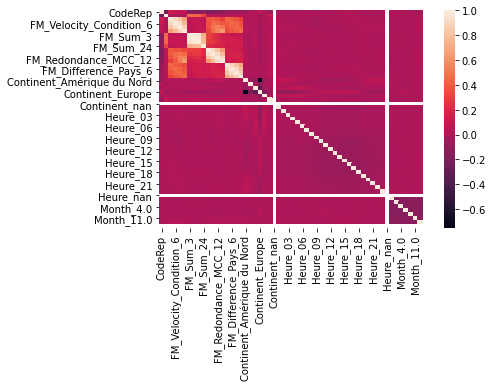

In [63]:
corrMatrix_train = X_train.corr()
print("Matrice correlation : train")
sns.heatmap(corrMatrix_train) 

Matrice correlation : test


<AxesSubplot:>

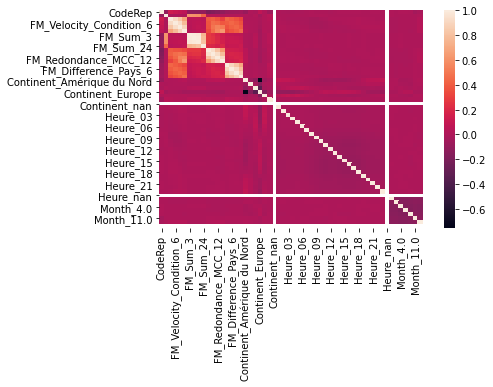

In [64]:
corrMatrix_test = X_test.corr()
print("Matrice correlation : test")
sns.heatmap(corrMatrix_test) 

In [ ]:
# On observe que les variables Sum, Redondance, Difference_Pays sont très correlés entre ces temporalités.
# On conserve juste les variables relatives aux dernières 3 et 24 heures

In [66]:
X_train.drop(['FM_Sum_6','FM_Sum_12','FM_Redondance_MCC_6', 'FM_Redondance_MCC_12','FM_Difference_Pays_6','FM_Difference_Pays_12', 
              'Continent', 'Heure', 'Month', 'Continent_nan', 'Heure_nan','Month_nan'], axis=1, inplace=True)
X_test.drop(['FM_Sum_6','FM_Sum_12','FM_Redondance_MCC_6', 'FM_Redondance_MCC_12','FM_Difference_Pays_6','FM_Difference_Pays_12',
            'Continent', 'Heure', 'Month', 'Continent_nan', 'Heure_nan','Month_nan'], axis=1, inplace=True)

### Random Forest

In [68]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2595.2870069379996

 Paramètres optimaux : 
OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', 9), ('n_estimators', 146)])

 Résultats  : 0.8121159846125348


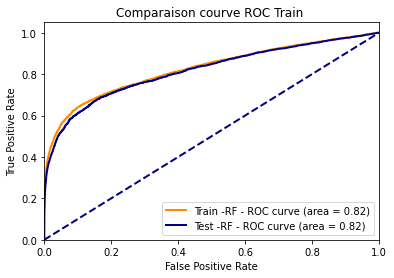

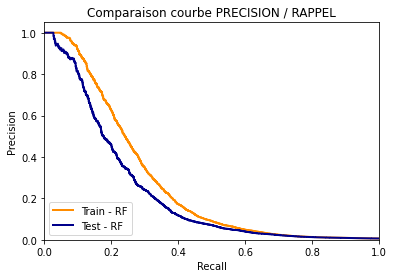

In [69]:
# Apprentissage du modèle

rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train,y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, rf_clf.predict_proba(X_train)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(y_train,
                                                                         rf_clf.predict_proba(X_train)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(y_test,
                                                                         rf_clf.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [70]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 5 variables les plus importantes : 



,Variable,Feature Importance
5,FM_Velocity_Condition_24,0.121029
7,FM_Sum_24,0.114923
3,FM_Velocity_Condition_6,0.089134
4,FM_Velocity_Condition_12,0.080289
6,FM_Sum_3,0.067547
2,FM_Velocity_Condition_3,0.063457
1,Montant,0.057112
11,FM_Difference_Pays_24,0.052424
13,Continent_Amérique du Sud,0.043411
9,FM_Redondance_MCC_24,0.039721


In [ ]:
# Les variables qui ont les plus d'impact sont le montant cummulé, le nombre des transactions et le montant de la transaction.